In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [381]:
from bb_binary import FrameContainer, Repository, load_frame_container
import pandas as pd
import numpy as np
from collections import namedtuple 
from pandas import DataFrame, Series
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import random

from collections import Counter
import bib.preprocessing as prep

# Speed of Bees (6 min Dataset, Cam0)
* Erster Versuch mit meinen Daten (umformen in Zeitreihen)
* Zweiter Versuch mit Kadirs Daten (Tracks)

In [13]:
path = "00_Data/testset_2015_20m/2015082215/"

In [17]:
fc = prep.get_fc(path, 0)

In [20]:
df = prep.get_dataframe2(fc)

In [22]:
df = prep.calcIds(df,0.95)

In [368]:
df.head()

,idx,xpos,ypos,radius,zRotation,frame_idx,timestamp,cam_id,fc_id,confidence,id
0,0,51,1912,22.742498,0.505413,0,1.440257e+09,0,14905447169876506043,1.000000,696
1,1,49,3050,22.789341,2.598309,0,1.440257e+09,0,14905447169876506043,1.000000,856
3,3,64,1338,22.750143,0.923082,0,1.440257e+09,0,14905447169876506043,1.000000,3563
4,4,77,2439,22.995449,0.096520,0,1.440257e+09,0,14905447169876506043,0.992157,3434
5,5,76,2949,23.107546,-1.235086,0,1.440257e+09,0,14905447169876506043,0.992157,716


In [166]:
def f():
    u_id = df.id.unique()
    num_columns = len((df.frame_idx.unique()))
    num_rows = len(u_id)
    mapping = {k:i for i,k in enumerate(u_id)}
    arr =  np.zeros(shape=(num_rows, num_columns)).astype(tuple)
    dft = pd.DataFrame(arr)

    i = 0
    for a, row in df.iterrows():
        dft.iat[mapping[row.id], row.frame_idx] = (row.xpos, row.ypos)
    
    dft.index = u_id
    return dft

In [310]:
dft = f()

## Umgeformter Datensatz (Zeitreihen mit x, y Positionen als Tupel)

In [369]:
dft.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,total
696,"(51, 1912)","(52, 1912)","(76, 1913)","(51, 1937)","(51, 1937)",0,"(51, 1937)","(63, 1936)","(51, 1937)",0,...,0,0,0,0,0,0,0,0,0,2626.962694
856,"(49, 3050)","(87, 3050)","(99, 3038)","(112, 3037)","(125, 3037)","(162, 3051)",0,0,"(237, 3064)","(250, 3064)",...,0,0,0,0,0,0,0,0,0,9594.466137
3563,"(64, 1338)","(64, 1338)","(89, 1350)","(88, 1363)","(76, 1363)","(89, 1350)","(101, 1350)","(89, 1338)","(89, 1350)","(77, 1350)",...,0,0,0,0,0,0,0,0,0,6543.433128
3434,"(77, 2439)",0,0,0,"(64, 2451)","(77, 2426)","(77, 2426)","(77, 2413)","(77, 2426)","(77, 2426)",...,0,0,"(451, 1826)",0,"(463, 1813)","(439, 1814)","(463, 1800)","(451, 1813)","(439, 1812)",8887.989906
716,"(76, 2949)","(50, 2974)",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,167.332381


# Gesamter Weg einer Biene

In [312]:
def distance(liste):
    liste = list(liste[liste != 0])
    summe = 0
    
    for (px1,py1), (px2,py2) in zip(liste, liste[1:]):
        d = np.sqrt(np.square(px1 - px2) + np.square(py1 - py2))
        summe += d
    return summe

In [313]:
dft['total'] = dft.apply(distance, axis=1)

In [372]:
dft.total.head()

696     2626.962694
856     9594.466137
3563    6543.433128
3434    8887.989906
716      167.332381
Name: total, dtype: float64

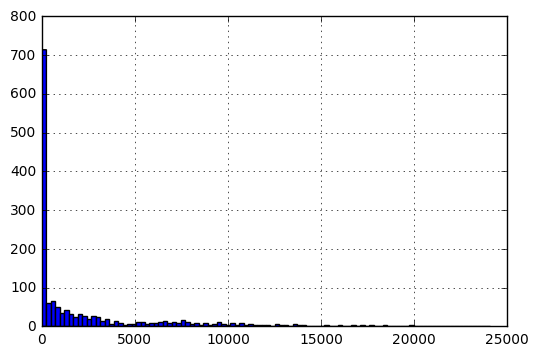

In [321]:
dft.total.hist(bins=100)

In [326]:
dft.total.describe()

count     1555.000000
mean      2702.868612
std       4358.104390
min          0.000000
25%          0.000000
50%        501.722035
75%       3385.024057
max      24094.638502
Name: total, dtype: float64

## Beispiel Bewegung einer Biene (lange Distanz)

In [506]:
dftlong = dft[dft.total > 20000]
dftlong.shape
ex = dftlong.iloc[2]

In [507]:
data = list(ex[ex != 0])[:-1]

In [508]:
data = DataFrame(data, columns=['x', 'y'])

(0, 4000)

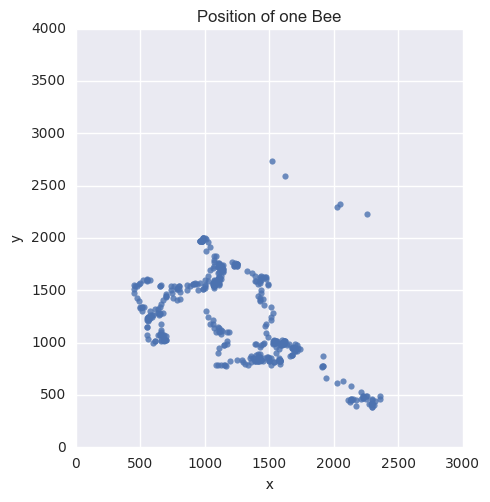

In [509]:
sns.lmplot(x='x', y='y', data=data, fit_reg=False)
plt.title('Position of one Bee')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,3000)
plt.ylim(0,4000)

# Using Track Data

In [327]:
dd = pd.read_pickle("bee_relative_singlecam.pickle")

In [329]:
dd['dist'] = np.sqrt(dd.x.pow(2) + dd.y.pow(2))

In [330]:
dd.head()

,timestamp,x,y,track_id,id,abs_orientation,turn_velocity,dist
1,0.334019,13.0,-12.0,22,f10008418946791263827d22c1,2.107346,0.057285,17.691806
2,0.333019,12.0,0.0,22,f14833439648217778241d22c1,2.035695,0.071651,12.000000
3,0.333019,13.0,0.0,22,f14496160650241856162d22c1,2.297365,0.261671,13.000000
4,0.334019,-1.0,12.0,22,f14871950799153320900d23c1,2.013552,0.283814,12.041595
5,0.333019,1.0,1.0,22,f10882062306833271369d24c1,1.869439,0.144113,1.414214


## Distribution of Travel Distance

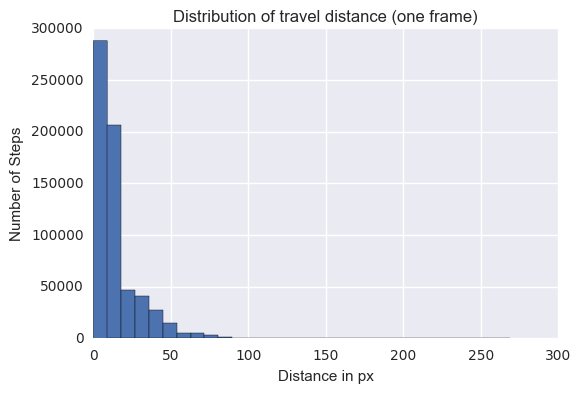

In [513]:
dd.dist.hist(bins=30)
#plt.xlim(0,120)
plt.title('Distribution of travel distance (one frame)')
plt.xlabel('Distance in px')
plt.ylabel('Number of Steps')

In [338]:
dd.dist.describe()

count    642260.000000
mean         12.789929
std          16.087454
min           0.000000
25%           0.000000
50%          12.000000
75%          17.691806
max         269.007435
Name: dist, dtype: float64

Der Durchschnitt, wenn man alle Schritte betrachtet (auch sich nicht bewegende Bienen) beträgt dann 13 px.

## Ohne die Stehenden Bienen
Da ist der Durchschnitt bei 23 px.

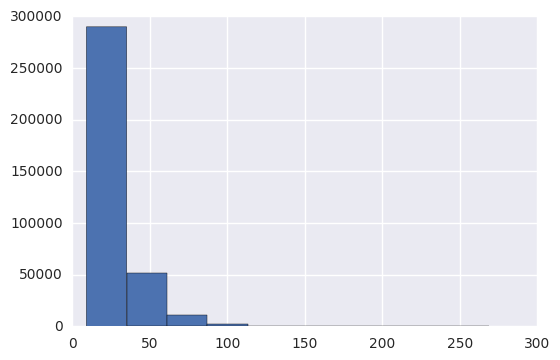

In [517]:
dd[dd.dist > 5].dist.hist()

In [520]:
dd[dd.dist > 5].dist.describe()

count    354238.000000
mean         22.987906
std          15.399973
min           9.055385
25%          13.000000
50%          17.691806
75%          27.730849
max         269.007435
Name: dist, dtype: float64

Auch wenn man die extrem langen Schritte rausnimmt, bleibt es bei 23px pro Frame.

In [521]:
dd.query('dist > 5 & dist < 200').dist.describe()

count    354229.000000
mean         22.982970
std          15.368648
min           9.055385
25%          13.000000
50%          17.691806
75%          27.730849
max         199.424171
Name: dist, dtype: float64

## Durchschnittliche Schrittlänge pro Track
Hier ist der Durchschnitt 18.4 px.

In [ ]:
track_dist_means = dd.dist.groupby(dd.track_id).mean()

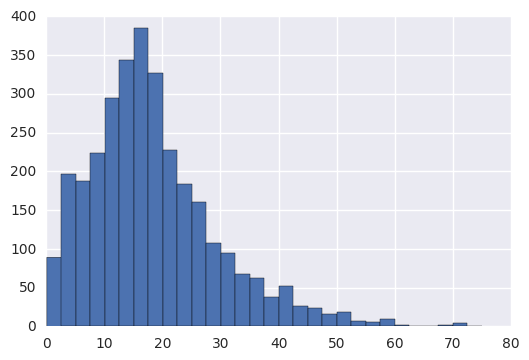

In [525]:
track_dist_means.hist(bins=30)

In [526]:
track_dist_means.describe()

count    3155.000000
mean       18.407499
std        11.102862
min         0.134328
25%        10.969599
50%        16.685208
75%        23.667140
max        74.986359
Name: dist, dtype: float64

## Nur Tracks betrachten wo sich die Bienen wirklich bewegen.

In [546]:
tracks_with_walking = track_dist_means[track_dist_means > 15].index

In [547]:
dd[dd.track_id.isin(tracks_with_walking)].dist.mean()

23.713653877960379